#Importing libraries and dataset

Firsly we'll import the necessary libraries

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Thenn we'll import our dataset

In [ ]:
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#Analysing our data

In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
print(dataset.info())
print("\nNull Values:")
dataset.isna().sum() #all of our values are non null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Null Values:


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Checking for duplicates

In [ ]:
dataset.duplicated().sum()

0

**Visualising Data**

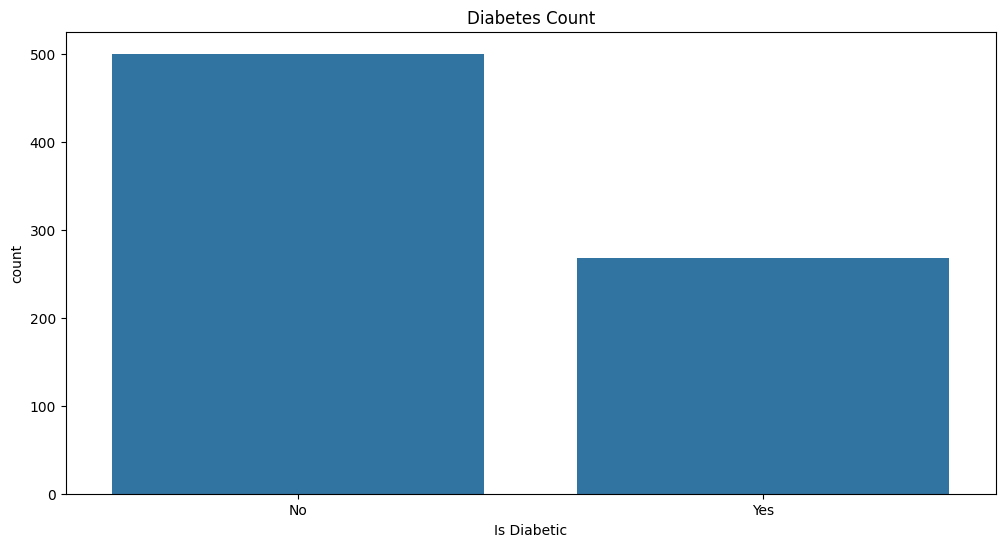

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Outcome', data = dataset)
plt.xlabel("Is Diabetic")
plt.title("Diabetes Count")
plt.xticks([0, 1], ["No", "Yes"])
plt.show()

Finding Outliers

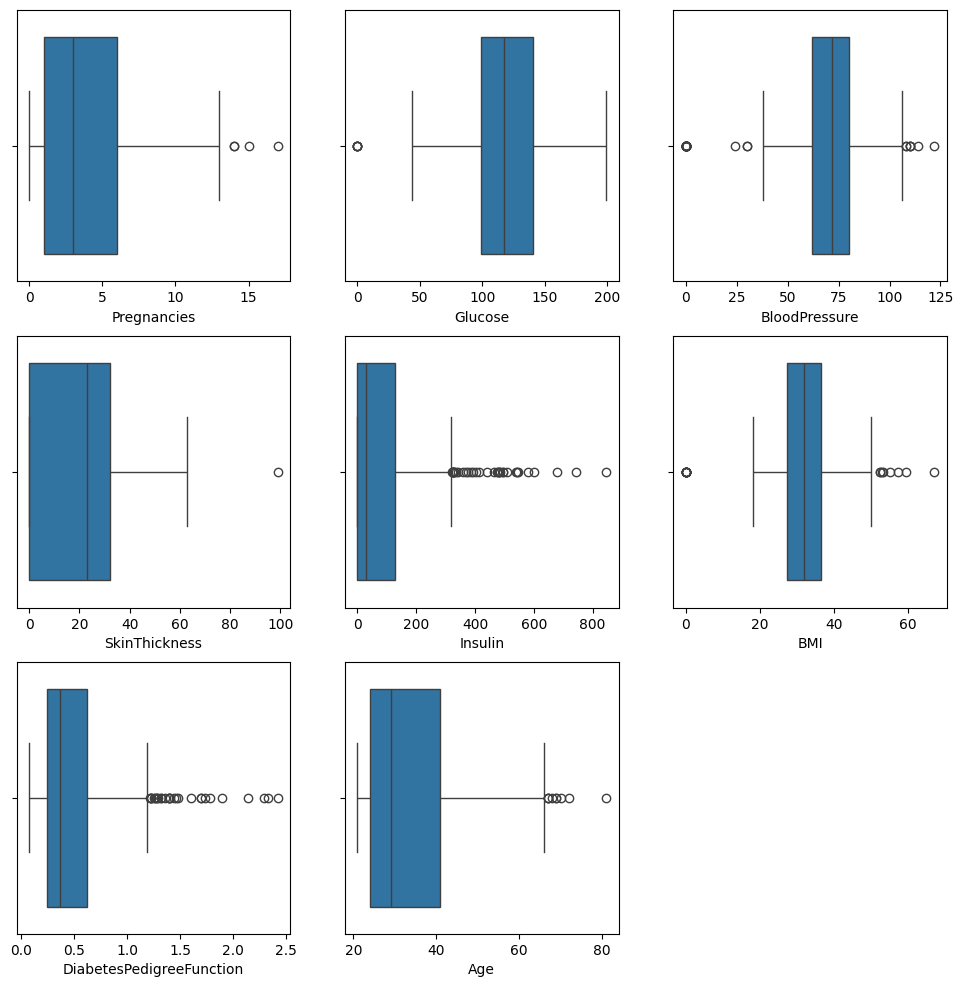

In [ ]:
plt.figure(figsize=(12, 12))
for i, col in enumerate(dataset.columns[0: dataset.columns.size - 1]):
  plt.subplot(3, 3, i+1)
  sns.boxplot(x=col, data=dataset)
plt.show()

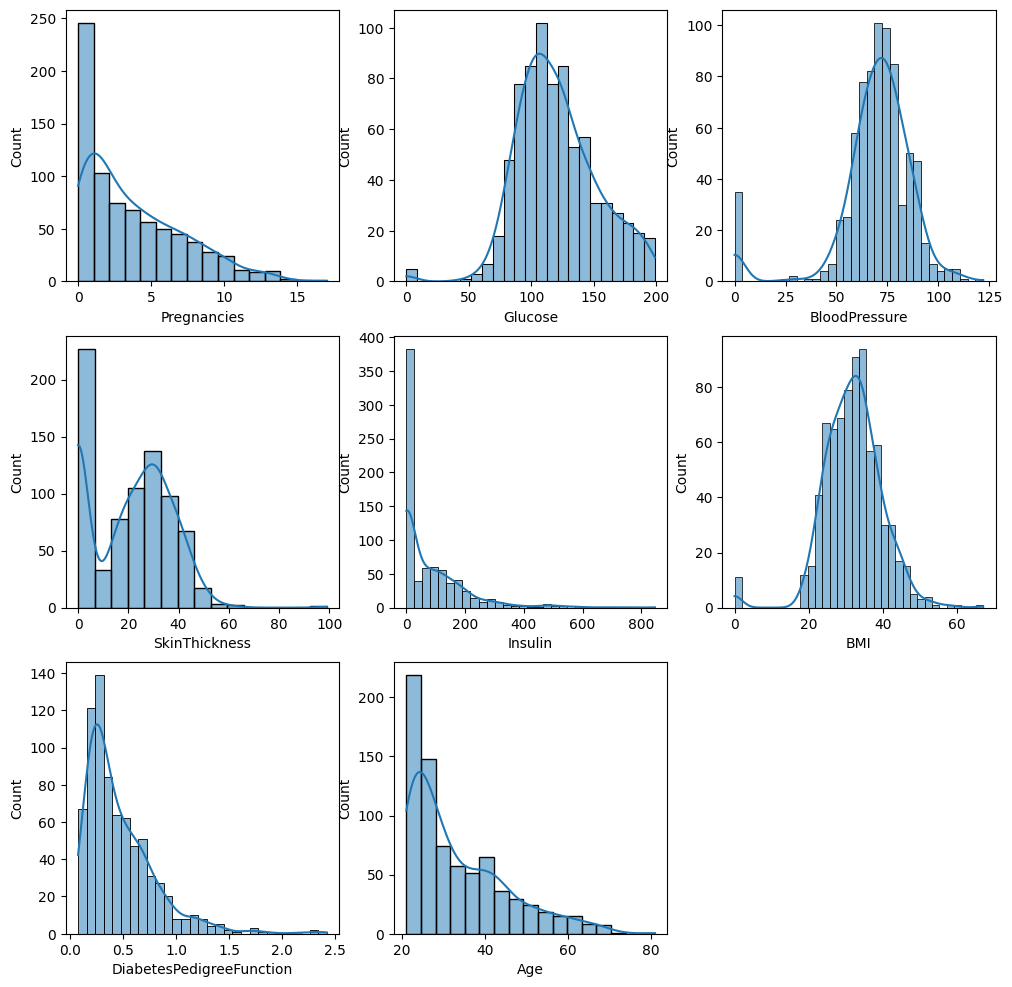

In [ ]:
plt.figure(figsize=(12, 12))
for i, col in enumerate(dataset.columns[0: dataset.columns.size - 1]):
  plt.subplot(3, 3, i+1)
  sns.histplot(x=col, data=dataset, kde=True)
plt.show()

#Creating our model

**Standard scaling the dataset**

In [ ]:
scaler = StandardScaler()
X = pd.DataFrame(
    scaler.fit_transform(dataset.drop(['Outcome'], axis=1 ), ),
    columns=dataset.columns[0: dataset.columns.size - 1]
)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [ ]:
y = dataset['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

**Creating train and test split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

**Finding the max training and testing scores to find the required amount of neighbors**

In [ ]:
test_scores = []
train_scores = []

for i in range(1, 15):
  knn = KNeighborsClassifier(i)
  knn.fit(X_train, y_train)

  train_scores.append(knn.score(X_train, y_train))
  test_scores.append(knn.score(X_test, y_test))

In [ ]:
max_train_score = max(train_scores)
train_scores_index = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100, list(map(lambda x: x + 1, train_scores_index))))

Max train score 100.0 % and k = [1]


In [ ]:
max_test_score = max(test_scores)
test_scores_index = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100, list(map(lambda x: x + 1, test_scores_index))))

Max test score 77.92207792207793 % and k = [13]


**Visualising Training and Test Scores**

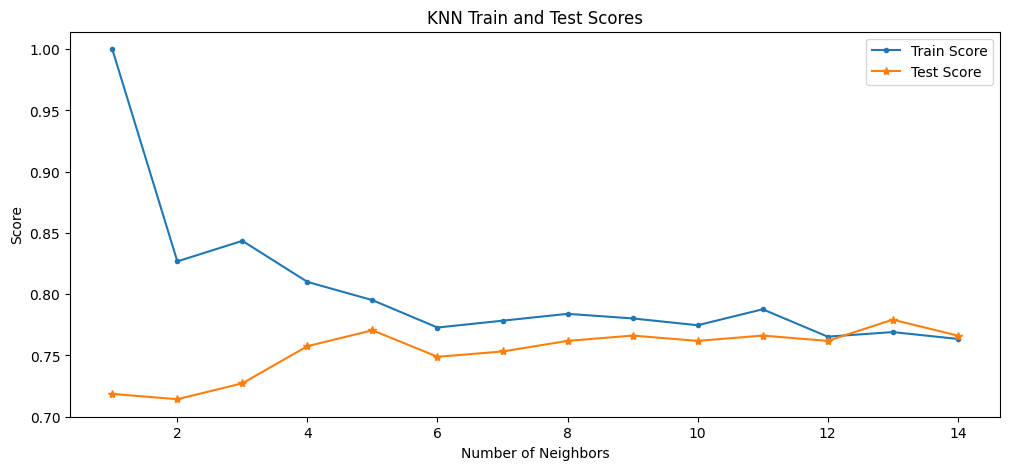

In [ ]:
plt.figure(figsize=(12, 5))
x_range = range(1, 15)
plt.plot(x_range, train_scores, marker='.', label='Train Score')
plt.plot(x_range, test_scores, marker='*', label='Test Score')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.title('KNN Train and Test Scores')
plt.legend()
plt.show()

**Defining and training the model**

In [ ]:
knn = KNeighborsClassifier(13)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7792207792207793

**Making predictions**

In [ ]:
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[141  16]
 [ 35  39]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.71      0.53      0.60        74

    accuracy                           0.78       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.78      0.77       231



#Predicting on user input

**Taking user input**

These values, according to ChatGPT, have a high likelihood of indicating diabetes:
* Pregnancies = 4
* Glucose = 180
* BloodPressure = 90
* SkinThickness = 32
* Insulin = 200
* BMI = 35.0
* DiabetesPedigreeFunction = 1.2
* Age = 50

In [ ]:
Pregnancies = float(input("Enter the number of pregnancies: "))
Glucose = float(input("Enter the glucose level: "))
BloodPressure = float(input("Enter the blood pressure: "))
SkinThickness = float(input("Enter the skin thickness: "))
Insulin = float(input("Enter the insulin level: "))
BMI = float(input("Enter the BMI: "))
DiabetesPedigreeFunction = float(input("Enter the diabetes pedigree function: "))
Age = float(input("Enter the age: "))

Enter the number of pregnancies: 4
Enter the glucose level: 180
Enter the blood pressure: 90
Enter the skin thickness: 32
Enter the insulin level: 200
Enter the BMI: 35.0
Enter the diabetes pedigree function: 1.2
Enter the age: 50


Convert user input into a dataframe

In [ ]:
userInput = pd.DataFrame(
    [[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]],
    columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
)
userInput

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,4.0,180.0,90.0,32.0,200.0,35.0,1.2,50.0


**Predicting values**

In [ ]:
prediction = knn.predict(userInput)[0]
print(prediction)

1


In [ ]:
if prediction == 0:
  print(f"The person is not diabetic")
else:
  print(f"The person is diabetic")

The person is diabetic
